# Curve di possibilità pluviometrica - dati orari

Il seguente notebook permette di ottenere le curve di possibilità pluviometrica per degli assegnati tempi di ritorno dalla distribuzione di probabilità precedentemente ottenuta.
Le curve di possibilità pluviometrica si calcolano come di seguito:

$$ h(t_p, Tr) = a(T_r) t_p^n$$

$$\log h(t_p, Tr) = \log a(T_r) + n \log t_p $$

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
from my_functions import*

os.getcwd()
data=leggi_orarie('MORI_massimi di precipitazione.xls')

In [2]:
data

,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,
1919.0,NaN,NaN,NaN,NaN,NaN
1920.0,NaN,NaN,NaN,NaN,NaN
1921.0,NaN,NaN,NaN,NaN,NaN
1922.0,NaN,NaN,NaN,NaN,NaN
1923.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006.0,29.2,29.6,43,56.4,62
2007.0,28.2,31.8,36.6,56,109.8
2008.0,NaN,NaN,NaN,NaN,NaN


In [3]:
best=pd.read_pickle("best_param")
best

,1 ora,3 ore,6 ore,12 ore,24 ore
a,19.345627,29.008748,38.945067,49.890848,66.109911
b,5.101285,7.074121,9.238680,13.282743,15.744317


In [4]:
best.columns

Index(['            1 ora', '            3 ore', '            6 ore',
       '            12 ore', '            24 ore'],
      dtype='object')

In [6]:
q10=1-1/10
q50=1-1/50
q150=1-1/150
pts=DataFrame([[qtls(best["            1 ora"],q10),
           qtls(best["            3 ore"],q10),
           qtls(best["            6 ore"],q10),
           qtls(best["            12 ore"],q10),
           qtls(best["            24 ore"],q10)],
          [qtls(best["            1 ora"],q50),
           qtls(best["            3 ore"],q50),
           qtls(best["            6 ore"],q50),
           qtls(best["            12 ore"],q50),
           qtls(best["            24 ore"],q50)],
          [qtls(best["            1 ora"],q150),
           qtls(best["            3 ore"],q150),
           qtls(best["            6 ore"],q150),
           qtls(best["            12 ore"],q150),
           qtls(best["            24 ore"],q150)]], index=[10,50,150],columns=[1,2,3,4,5]).T
pts

,10,50,150
1,30.825392,39.250529,44.889255
2,44.928120,56.611536,64.430945
3,59.735491,74.993830,85.205842
4,79.781898,101.719295,116.401428
5,101.540408,127.543270,144.946314


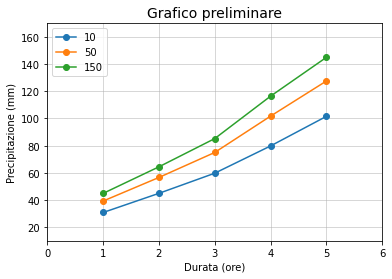

In [7]:
plot1_orarie(pts)

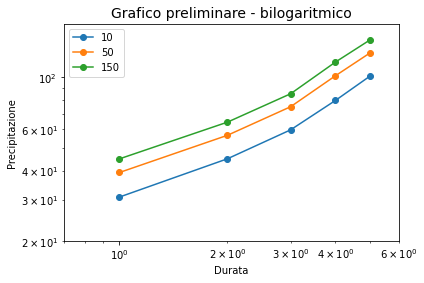

In [8]:
plot2_orarie(pts)

In [9]:
in10, in50, in150 = n_a(pts)
fnl=DataFrame([in10,in50,in150],index=[10,50,150],columns=["n","a"])
fnl

,n,a
10,0.729641,28.962046
50,0.724964,36.770625
150,0.722789,41.996432


In [10]:
h10, h50, h150, tp = h1(fnl)
inh=DataFrame([h10,h50,h150],index=["Tr = 10","Tr = 50","Tr = 150"],
              columns=tp).T
inh[:2]

,Tr = 10,Tr = 50,Tr = 150
0.700000,22.325767,28.392436,32.452707
0.995960,28.876618,36.662859,41.873719
1.291919,34.913319,44.273377,50.537308
1.587879,40.583907,51.414591,58.662560
1.883838,45.974014,58.196623,66.375984


(<AxesSubplot:title={'center':'Curve di possibilità pluviometrica'}, xlabel='Durata (giorni)', ylabel='Precipitazione (mm)'>,
 <AxesSubplot:title={'center':'Curve di possibilità pluviometrica - bilogaritmico'}, xlabel='Durata', ylabel='Precipitazione'>)

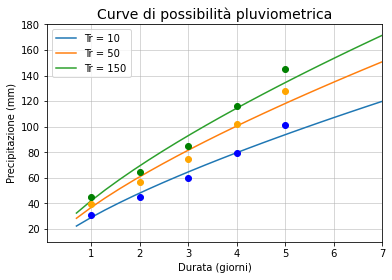

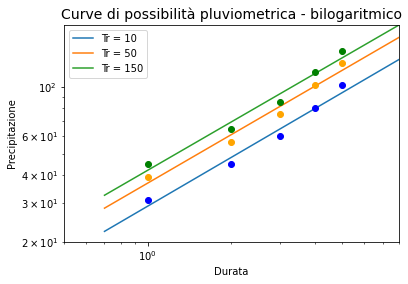

In [11]:
final_plots_orarie(inh, pts)
#plotplot(inh, pts)

In [12]:
#plotplot2(inh, pts)